# Desafio da Semana

Objetivo: Sedimentar os conhecimentos de Análise de Dados que aprendemos nessa aula. 

Desafio: Criar um notebook de análise exploratória (como fizemos na nossa aula de hoje) com todas as etapas de coleta, limpeza, análise e visualização com base de dados da Olist.

Requisitos: 
- Formular o mínimo de 4 perguntas para responder com suas análises;
- Utilizar pelo menos 3 bases de dados da Olist (caso você deseje criar sua base do zero). Caso deseje continuar utilizando a que criamos em aula, é necessário incluir pelo menos mais 2 tabelas para enriquecer sua análise.   
- Criar pelo menos 3 gráficos.
- Exporte sua base final.


Submeta uma pasta que contenha: 
- o arquivo .ipynb com sua análise exploratória rodada, ou seja, com as respostas aparecendo no notebook;
- interpretações observadas a partir dos gráficos dentro do notebook;
- a base final criada por você no formato .csv;
- especificar quais bases da olist foram usadas;

In [3]:
import pandas as pd


TABELA DE PAGAMENTO

In [4]:
df_pagamento = pd.read_csv(r"C:\Users\nada_\OneDrive\Desktop\REPROGRAMA\on33-python-S14-analise-de-dados\exercicios\para-casa\Francitelma\olist_order_payments_dataset.csv")
df_pagamento.head()



,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [5]:
info_df = df_pagamento.info()
print(info_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None


In [6]:
df_pagamento.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


TABELA CONSUMIDOR

In [7]:
df_consumidor = pd.read_csv(r"C:\Users\nada_\OneDrive\Desktop\REPROGRAMA\on33-python-S14-analise-de-dados\exercicios\para-casa\Francitelma\olist_customers_dataset.csv")
df_consumidor.head()


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [8]:
info_df = df_consumidor.info()
print(info_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None


In [9]:
df_consumidor.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [10]:
df_consumidor = df_consumidor.drop('customer_unique_id', axis=1)   #dropando as colunas customer_unique_id e customer_zip_code_prefix
df_consumidor

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,13056,campinas,SP
...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,92120,canoas,RS


TABELA ITENS

In [11]:
df_items = pd.read_csv(r"C:\Users\nada_\OneDrive\Desktop\REPROGRAMA\on33-python-S14-analise-de-dados\exercicios\para-casa\Francitelma\olist_order_items_dataset.csv")
df_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [12]:
info_df = df_items.info()
print(info_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None


In [13]:
df_items.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


In [14]:

df_items = df_items.drop('seller_id', axis=1) #dropando colunas shipping_limit_date e seller_id
df_items

,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2017-08-21 00:04:32,55.99,8.72


TABELA REVIEWS

In [15]:
df_reviews = pd.read_csv(r"C:\Users\nada_\OneDrive\Desktop\REPROGRAMA\on33-python-S14-analise-de-dados\exercicios\para-casa\Francitelma\olist_order_reviews_dataset.csv")
df_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [16]:
info_df = df_reviews.info()
print(info_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None


In [17]:
df_reviews.describe(include='all')

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


In [18]:
df_reviews = df_reviews.drop('review_comment_message', axis=1) #dropando colunas review_comment_title e review_comment_message
df_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,2018-03-01 00:00:00,2018-03-02 10:26:53


In [19]:
# Jutando os df pagamento e df_items
df_olist = pd.merge(df_pagamento, df_items, on='order_id', how='inner')
df_olist

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,shipping_limit_date,price,freight_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,1,af74cc53dcffc8384b29e7abfa41902b,2018-05-02 22:15:09,79.80,19.53
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,1,a630cc320a8c872f9de830cf121661a3,2018-07-02 11:18:58,17.00,7.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,1,2028bf1b01cafb2d2b1901fca4083222,2017-12-26 09:52:34,56.99,8.72
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,1,548e5bfe28edceab6b51fa707cc9556f,2017-12-12 12:13:20,89.90,17.88
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,1,386486367c1f9d4f587a8864ccb6902b,2018-05-31 16:14:41,113.57,14.88
...,...,...,...,...,...,...,...,...,...,...
117596,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,1,1302fd16bdfe85e523940c846370ef2c,2018-03-15 03:55:25,297.00,66.31
117597,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,1,fb55982be901439613a95940feefd9ee,2017-08-24 10:04:56,79.00,17.80
117598,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,1,848ef0a103ee21407d1fbd0f7e7ae179,2017-11-27 17:46:05,39.99,7.78
117599,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54,1,e9c1abcc7126360336d8f56d49041a8c,2018-08-13 23:45:00,349.00,20.54


In [20]:
# Jutando agora com os dados de reviews
df_olist1 = pd.merge(df_olist, df_reviews, on='order_id', how='inner')
df_olist1

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,1,af74cc53dcffc8384b29e7abfa41902b,2018-05-02 22:15:09,79.80,19.53,4ce650e117a5b292bf5ea980a61eb61e,1,Não recomendo,2018-05-10 00:00:00,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,1,a630cc320a8c872f9de830cf121661a3,2018-07-02 11:18:58,17.00,7.39,ad2036caca61484fc435d7e673c020f2,5,NaN,2018-06-30 00:00:00,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,1,2028bf1b01cafb2d2b1901fca4083222,2017-12-26 09:52:34,56.99,8.72,bcddfa0f7d2e54cfc74bae4f01b84d92,5,NaN,2017-12-19 00:00:00,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,1,548e5bfe28edceab6b51fa707cc9556f,2017-12-12 12:13:20,89.90,17.88,c37a0e51e5df82bdb55d38ff0ffb6af3,5,NaN,2017-12-21 00:00:00,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,1,548e5bfe28edceab6b51fa707cc9556f,2017-12-12 12:13:20,89.90,17.88,5bc7680443b4ef765fec11a8201eeb0c,5,NaN,2017-12-21 00:00:00,2017-12-22 01:10:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117324,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,1,1302fd16bdfe85e523940c846370ef2c,2018-03-15 03:55:25,297.00,66.31,9f402e937d15b4664948410079ab687d,5,NaN,2018-03-17 00:00:00,2018-03-20 15:17:08
117325,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,1,fb55982be901439613a95940feefd9ee,2017-08-24 10:04:56,79.00,17.80,f78d2909c6c202d3cabb8bac3fc00e75,5,NaN,2017-08-24 00:00:00,2017-08-25 19:38:31
117326,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,1,848ef0a103ee21407d1fbd0f7e7ae179,2017-11-27 17:46:05,39.99,7.78,2cdb88f8dce688bb85e20a5cf069e589,1,NaN,2017-12-07 00:00:00,2017-12-07 09:00:59
117327,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54,1,e9c1abcc7126360336d8f56d49041a8c,2018-08-13 23:45:00,349.00,20.54,6c698e5d193ab18db7615ea75a28866e,5,NaN,2018-08-22 00:00:00,2018-08-23 15:29:34


In [21]:
info_df = df_olist1.info()
print(info_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117329 entries, 0 to 117328
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   order_id                 117329 non-null  object 
 1   payment_sequential       117329 non-null  int64  
 2   payment_type             117329 non-null  object 
 3   payment_installments     117329 non-null  int64  
 4   payment_value            117329 non-null  float64
 5   order_item_id            117329 non-null  int64  
 6   product_id               117329 non-null  object 
 7   shipping_limit_date      117329 non-null  object 
 8   price                    117329 non-null  float64
 9   freight_value            117329 non-null  float64
 10  review_id                117329 non-null  object 
 11  review_score             117329 non-null  int64  
 12  review_comment_title     13892 non-null   object 
 13  review_creation_date     117329 non-null  object 
 14  revi

In [128]:
df_olist1.head(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_creation_date,review_answer_timestamp,payment_value_bin,payment_value_installments,payment_installments_bin,parcelas_bin
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,1,af74cc53dcffc8384b29e7abfa41902b,2018-05-02 22:15:09,79.80,19.53,4ce650e117a5b292bf5ea980a61eb61e,1,Não recomendo,2018-05-10 00:00:00,2018-05-15 23:38:00,0-100,99.33 - 8 parcelas,7 a 12 vezes,7 a 12 vezes
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,1,a630cc320a8c872f9de830cf121661a3,2018-07-02 11:18:58,17.00,7.39,ad2036caca61484fc435d7e673c020f2,5,NaN,2018-06-30 00:00:00,2018-07-03 11:23:16,0-100,24.39 - 1 parcelas,1 vez,1 vez
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,1,2028bf1b01cafb2d2b1901fca4083222,2017-12-26 09:52:34,56.99,8.72,bcddfa0f7d2e54cfc74bae4f01b84d92,5,NaN,2017-12-19 00:00:00,2017-12-22 17:55:30,0-100,65.71 - 1 parcelas,1 vez,1 vez
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,1,548e5bfe28edceab6b51fa707cc9556f,2017-12-12 12:13:20,89.90,17.88,c37a0e51e5df82bdb55d38ff0ffb6af3,5,NaN,2017-12-21 00:00:00,2017-12-21 21:42:31,101-200,107.78 - 8 parcelas,7 a 12 vezes,7 a 12 vezes
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,1,548e5bfe28edceab6b51fa707cc9556f,2017-12-12 12:13:20,89.90,17.88,5bc7680443b4ef765fec11a8201eeb0c,5,NaN,2017-12-21 00:00:00,2017-12-22 01:10:39,101-200,107.78 - 8 parcelas,7 a 12 vezes,7 a 12 vezes
5,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,1,386486367c1f9d4f587a8864ccb6902b,2018-05-31 16:14:41,113.57,14.88,d4f36356231f2e8a28c0209df9181c29,5,NaN,2018-06-02 00:00:00,2018-06-05 15:19:55,101-200,128.45 - 2 parcelas,2 a 6 vezes,2 a 6 vezes
6,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12,1,eff40981f3d4639fb50c5dd51ac00d7a,2018-05-11 15:31:11,34.35,13.71,d9a5d41bc78d0f565a7b8ac13585e9a9,5,10,2018-05-15 00:00:00,2018-05-15 22:41:43,0-100,96.12 - 2 parcelas,2 a 6 vezes,2 a 6 vezes
7,298fcdf1f73eb413e4d26d01b25bc1cd,1,credit_card,2,96.12,2,eff40981f3d4639fb50c5dd51ac00d7a,2018-05-11 15:31:11,34.35,13.71,d9a5d41bc78d0f565a7b8ac13585e9a9,5,10,2018-05-15 00:00:00,2018-05-15 22:41:43,0-100,96.12 - 2 parcelas,2 a 6 vezes,2 a 6 vezes
8,771ee386b001f06208a7419e4fc1bbd7,1,credit_card,1,81.16,1,42a2c92a0979a949ca4ea89ec5c7b934,2017-06-29 13:25:19,59.90,21.26,35f54313f077af011b5e3a8f0dafb9d7,5,NaN,2017-07-04 00:00:00,2017-07-05 00:12:17,0-100,81.16 - 1 parcelas,1 vez,1 vez
9,3d7239c394a212faae122962df514ac7,1,credit_card,3,51.84,1,92e16cf2fab490ab9ae87a305d5f8f7f,2017-06-09 10:55:16,39.99,11.85,1e23005084e0ca486cb6be7f343ab1ef,4,NaN,2017-06-24 00:00:00,2017-06-27 11:04:19,0-100,51.84 - 3 parcelas,2 a 6 vezes,2 a 6 vezes


In [127]:
# Exportando a base final
df_olist1.to_csv('base_final_s14_olist1.csv', index=False)

## Analisando os dados

#Agora chegou a hora de respondermos as perguntas que estipulamos no começo dessa análise:
#-1 Os produtos com preços mais altos tendem a receber pontuações de revisão mais altas?
#-2 Porcentagem de vendas em que os clientes optam por pagar no boleto. 
#-3 Quais intervalos de pagamento contribuem mais para o faturamento total?
#-4 Quanto a empresa tem em parcelamentos para receber?


In [163]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

## 1 - Os produtos com preços mais altos tendem a receber pontuações de revisão mais altas?

In [160]:
#Descobrindo os preços mais altos
top_prices_df = df_olist1.sort_values(by='price', ascending=False)
# Selecionar os 50 produtos com os preços mais altos
top_50_highest_prices = top_prices_df.head(15)
# Obter as pontuações de revisão desses 50 produtos
review_scores_top_50 = top_50_highest_prices[['price', 'review_score']]
print(review_scores_top_50)

          price  review_score
46827   6735.00             5
96609   6499.00             5
48840   4799.00             5
7252    4690.00             4
76367   4590.00             5
78130   4399.87             5
94608   4099.99             5
106316  4059.00             4
53512   3999.90             5
103591  3999.00             2
81509   3999.00             2
4791    3980.00             5
5938    3930.00             4
1832    3899.00             5
112880  3899.00             5


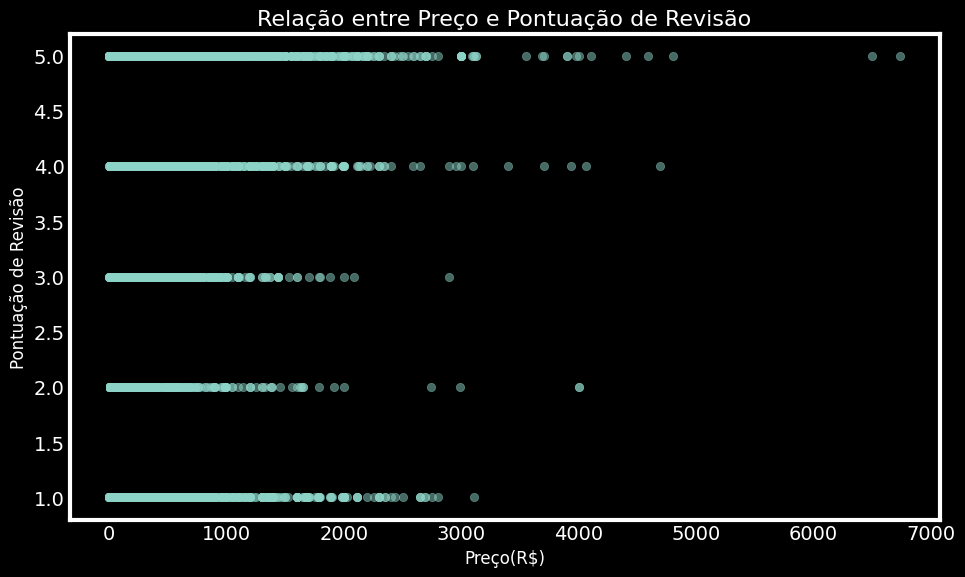

In [159]:
#Mostrando visualmente que as vendas mais caras geram feedbacks altos 
plt.figure(figsize=(10, 6))
plt.scatter(df_olist1['price'], df_olist1['review_score'], alpha=0.5)
plt.xlabel('Preço(R$)')
plt.ylabel('Pontuação de Revisão')
plt.title('Relação entre Preço e Pontuação de Revisão')
plt.grid(False)
plt.show()

O grafico mostra que as vendas com os preços mais altos tem tambem um feedback alto. E reforçando essa analise, o codigo acima dos 15 primeiros preços.

## 2 - Porcentagem de vendas em que os clientes optam por pagar no boleto.

In [24]:
df_olist1.describe().T

,count,mean,std,min,25%,50%,75%,max
payment_sequential,117329.0,1.094452,0.731174,1.00,1.00,1.00,1.00,29.00
payment_installments,117329.0,2.940151,2.775370,0.00,1.00,2.00,4.00,24.00
payment_value,117329.0,172.062565,265.388194,0.00,60.75,108.10,189.06,13664.08
order_item_id,117329.0,1.194121,0.684225,1.00,1.00,1.00,1.00,21.00
price,117329.0,120.524349,182.944843,0.85,39.90,74.90,134.90,6735.00
freight_value,117329.0,20.027514,15.828077,0.00,13.08,16.28,21.18,409.68
review_score,117329.0,4.031467,1.387927,1.00,4.00,5.00,5.00,5.00


In [25]:
df_olist1["payment_type"].value_counts(normalize=True)*100

payment_type
credit_card    73.741360
boleto         19.462367
voucher         5.354175
debit_card      1.442099
Name: proportion, dtype: float64

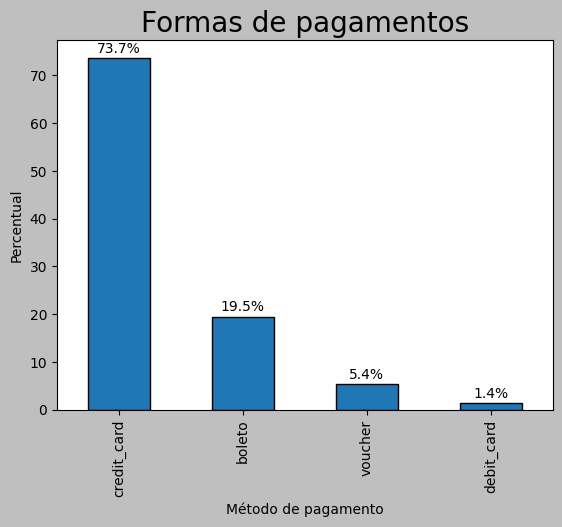

In [98]:
payment_type = pd.Series({
    'credit_card': 73.684033,
    'boleto': 19.488350,
    'voucher': 5.389338,
    'debit_card': 1.438279
}, name='proportion')

#criando o grafico
ax = payment_type.plot(kind="bar", edgecolor="black", color=['#1f77b4'])

for i, value in enumerate(payment_type):
    percentage = f'{value:.1f}%'
    ax.text(i, value + 0.5, percentage, ha='center', va='bottom')

#configurações
plt.style.use('fivethirtyeight')
plt.xlabel("Método de pagamento")
plt.ylabel("Percentual")
plt.title("Formas de pagamentos")
plt.show()

19,5% dos clientes optam por pagar na forma de pagamento Boleto.

## 3 - Quais intervalos de pagamento contribuem mais para o faturamento total?

In [29]:
preço = df_olist1['payment_value'].value_counts().reset_index()
preço.columns = ['payment_value', 'count']
print(preço)

#quantas vezes determinado preço aparece na tabela

       payment_value  count
0              50.00    348
1             100.00    287
2              20.00    285
3              77.57    250
4              35.00    163
...              ...    ...
28826         227.20      1
28827         960.49      1
28828           7.81      1
28829         293.54      1
28830         363.31      1

[28831 rows x 2 columns]


In [54]:
print(df_olist1.payment_value.min())
print(df_olist1.payment_value.max())   #fiz o min e o max pra saber como dividir os intervalos

0.0
13664.08


In [168]:
# Criar intervalos (bins) para a coluna 'payment_value'
bins = [0, 100, 200, 300, 400, 500, 600, 700, 14000]  
labels = ['0-100', '101-200', '201-300', '301-400', '401-500', '501-600', '601-700', '701-14000']

df_olist1['payment_value_bin'] = pd.cut(df_olist1['payment_value'], bins=bins, labels=labels)

print (df_olist1['payment_value_bin'])

0           0-100
1           0-100
2           0-100
3         101-200
4         101-200
           ...   
117324    301-400
117325      0-100
117326      0-100
117327    301-400
117328    101-200
Name: payment_value_bin, Length: 117329, dtype: category
Categories (8, object): ['0-100' < '101-200' < '201-300' < '301-400' < '401-500' < '501-600' < '601-700' < '701-14000']


  Intervalo de Pagamento  Contagem  Porcentagem
0                  0-100     54413    46.376429
1                101-200     36127    30.791194
2                201-300     12518    10.669144
3                301-400      5535     4.717504
4                401-500      2637     2.247526
5                501-600      1465     1.248626
6                601-700      1171     0.998048
7              701-14000      3457     2.946416


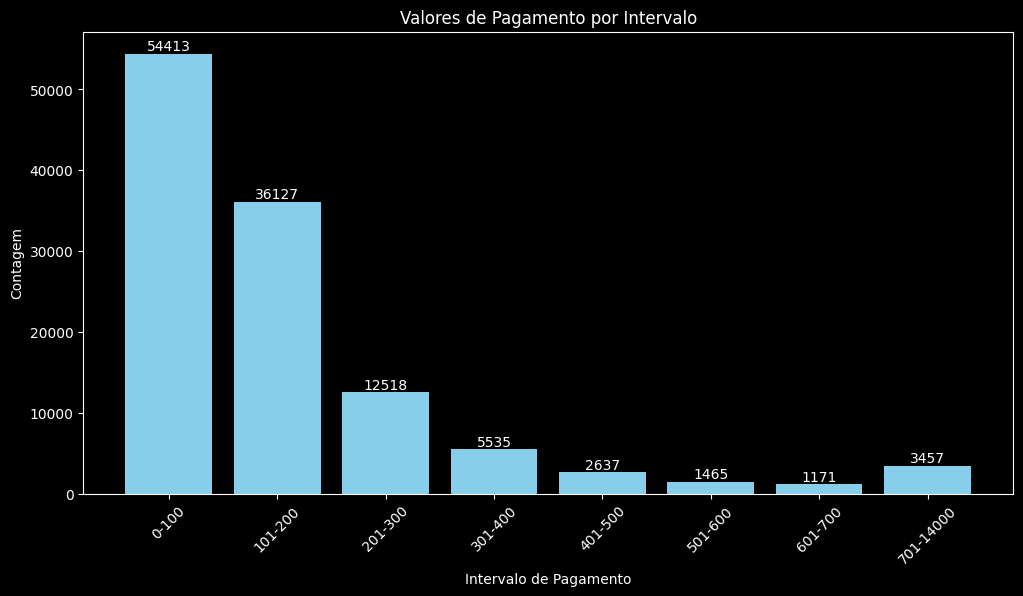

In [94]:
# Criar intervalos (bins) para a coluna 'payment_value'
bins = [0, 100, 200, 300, 400, 500, 600, 700, 14000]  
labels = ['0-100', '101-200', '201-300', '301-400', '401-500', '501-600', '601-700', '701-14000']

df_olist1['payment_value_bin'] = pd.cut(df_olist1['payment_value'], bins=bins, labels=labels)

print (df_olist1['payment_value_bin'])

# Contar o número de elementos em cada intervalo
preço_intervalado = df_olist1['payment_value_bin'].value_counts().sort_index().reset_index()
preço_intervalado.columns = ['Intervalo de Pagamento', 'Contagem']     #criei um dataFrame com essas colunas


preço_intervalado['Porcentagem'] = (preço_intervalado['Contagem'] / total_count) * 100


print(preço_intervalado)

# Criando um histograma
plt.figure(figsize=(12, 6))
bars = plt.bar(preço_intervalado['Intervalo de Pagamento'], preço_intervalado['Contagem'], color='skyblue')
plt.xlabel('Intervalo de Pagamento')
plt.ylabel('Contagem')
plt.title('Valores de Pagamento por Intervalo')
plt.xticks(rotation=45) 
plt.style.use('dark_background')

# Adicionar os valores no topo de cada barra
for i, value in enumerate(preço_intervalado['Contagem']):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)

plt.show()


#intervalo de preços 


O gráfico acima mostra que o intervalo de R$0,00 a R$100,00 é responsável por 54413 vendas e logo em seguida vem o intervalo de R$101,00 a R$200,00 
com 36127. Sendo assim, as vendas de produtos com esses valores é responsável por cerca de 46.37% e 30.79%, respectivamente, do valor total da receita.

## 4 - Quanto a empresa tem em parcelamentos para receber?

In [111]:
import locale  #para melhor visualização do montante em dinheiro

# Filtrar valores pagos em prestações de 1 vez (à vista)
pagamentos_a_vista = df_olist1[df_olist1['payment_installments'] <= 1]
soma_pagamento_a_vista = pagamentos_a_vista['payment_value'].sum()

# Filtrar valores pagos em prestações de 2 a 6 vezes
pagamentos_2_6 = df_olist1[(df_olist1['payment_installments'] >= 2) & (df_olist1['payment_installments'] <= 6)]
soma_2_6 = pagamentos_2_6['payment_value'].sum()

# Filtrar valores pagos em prestações de 7 a 12 vezes
pagamentos_7_12 = df_olist1[(df_olist1['payment_installments'] >= 7) & (df_olist1['payment_installments'] <= 12)]
soma_7_12 = pagamentos_7_12['payment_value'].sum()

# Filtrar valores pagos em prestações de 13 a 18 vezes
pagamentos_13_18 = df_olist1[(df_olist1['payment_installments'] >= 13) & (df_olist1['payment_installments'] <= 18)]
soma_13_18 = pagamentos_13_18['payment_value'].sum()

# Filtrar valores pagos em prestações de 19 a 24 vezes
pagamentos_19_24 = df_olist1[(df_olist1['payment_installments'] >= 19) & (df_olist1['payment_installments'] <= 24)]
soma_19_24 = pagamentos_19_24['payment_value'].sum()

# Filtrar valores pagos em prestações de 2 a 24 vezes
pagamentos_2_24 = df_olist1[(df_olist1['payment_installments'] >= 2) & (df_olist1['payment_installments'] <= 24)]
soma_2_24 = pagamentos_2_24['payment_value'].sum()

# Configurar para o padrão brasileiro
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')

# Formatando o número
pagamento_a_vista = locale.format_string("%.2f", soma_pagamento_a_vista, grouping=True)
total_parcelado = locale.format_string("%.2f", soma_2_24, grouping=True)   #formatei o numero do montante em reais, à vista e total parcelado, para melhor visualização

# Mostrar os resultados
print(f"Soma dos pagamentos à vista: R${pagamento_a_vista}")
print(f"Soma dos pagamentos em prestações de 2 a 6 vezes: R${soma_2_6:.2f}")
print(f"Soma dos pagamentos em prestações de 7 a 12 vezes: R${soma_7_12:.2f}")
print(f"Soma dos pagamentos em prestações de 13 a 18 vezes: R${soma_13_18:.2f}")
print(f"Soma dos pagamentos em prestações de 19 a 24 vezes: R${soma_19_24:.2f}")
print(f"Soma de todos os parcelamentos (em prestações de 2 a 24 vezes): R${total_parcelado}")



Soma dos pagamentos à vista: R$7.730.612,02
Soma dos pagamentos em prestações de 2 a 6 vezes: R$7293293.93
Soma dos pagamentos em prestações de 7 a 12 vezes: R$5060140.06
Soma dos pagamentos em prestações de 13 a 18 vezes: R$63858.00
Soma dos pagamentos em prestações de 19 a 24 vezes: R$40024.69
Soma de todos os parcelamentos (em prestações de 2 a 24 vezes): R$12.457.316,68


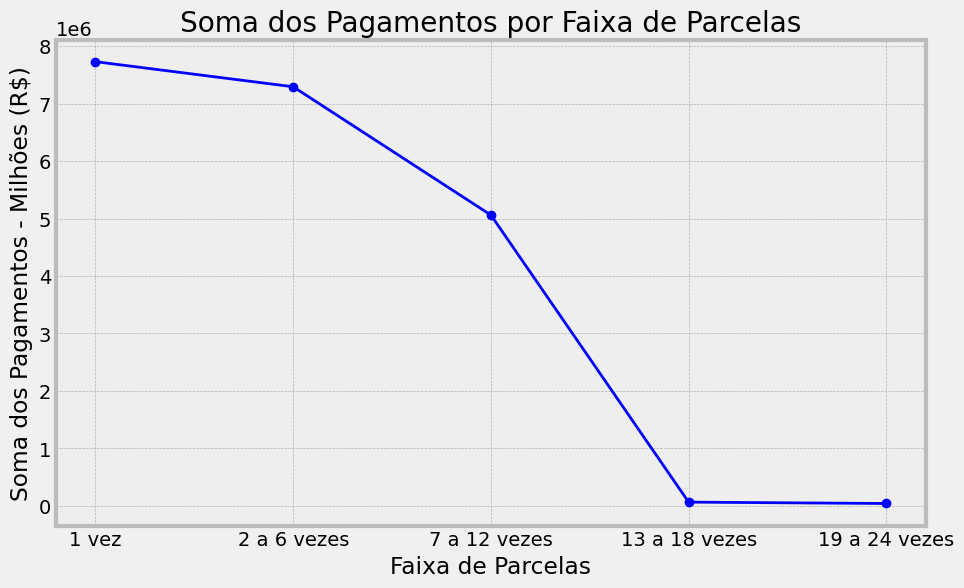

In [103]:

# Dados para o gráfico de linha
faixas = ['1 vez', '2 a 6 vezes', '7 a 12 vezes', '13 a 18 vezes', '19 a 24 vezes']
somas = [soma_pagamento_a_vista, soma_2_6, soma_7_12, soma_13_18, soma_19_24]
plt.style.use('bmh')

# Criando o gráfico de linha
plt.figure(figsize=(10, 6))
plt.plot(faixas, somas, marker='o', linestyle='-', color='b')
plt.xlabel('Faixa de Parcelas')
plt.ylabel('Soma dos Pagamentos - Milhões (R$)')
plt.title('Soma dos Pagamentos por Faixa de Parcelas')
plt.grid(True)
plt.show()


A soma de todos os parcelamentos (em prestações de 2 a 24 vezes) é de R$12.457.316,68

In [164]:
df_backup = df_olist1.copy() #backup (salvamento do documento)